<a href="https://colab.research.google.com/github/AbelJames26/Project_Mining/blob/main/Final_draft_copy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [29]:
import numpy as np
import pandas as pd
import scipy as sp
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import sqlite3
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

from utils import *


print(tf.__version__)

2.9.2


**Import Data Set**

In [30]:
Path = "/content/Project_Data.csv"
df = pd.read_csv(Path)
df.shape

(264, 21)

Visualize dataset

In [31]:
#Displaying the data
df.head()

,PROJECT_CODE,PROJECT_NAME,PROJECT_SHORT,PRIMARY COMMODITY,SITE_CODE,LATITUDE,LONGITUDE,SITE_LOCATION,ESTIMATING COMMODITY,EST_COM_AB,...,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Date,Gold_Value,RV_QTY_(Mt),Mineral_Land_Value_USD_Millions
0,J05288,8 Mile Dam,8 Mile Dam,Gold,S0236141,-30.645288,121.462217,Eastern Goldfields Superterrane,Gold,Au,...,7.014346,1.392000,9763.969632,2.099000,558.00000,9763.969632,1/10/2022,1662.4,1.670000,2776.20800
1,J02707,Goodenough / Kairiki,Goodenough,Gold,S0020062,-29.676897,121.077914,Eastern Goldfields Superterrane,Gold,Au,...,0.715700,1.971598,1411.073000,3.365000,20642.21000,1411.073000,1/10/2022,1662.4,1.354000,2250.88960
2,J04664,Ora Banda / Norton,Ora Banda,Gold,S0000642,-30.372109,121.088425,Eastern Goldfields Superterrane,Gold,Au,...,17.790000,1.859798,33085.800000,2.276660,14718.87760,47804.677600,1/10/2022,1662.4,34.057692,56617.50738
3,J00292,Paddington - Mt Pleasant,Paddington - Mt Pleasant,Gold,S0000566,-30.556269,121.227040,Eastern Goldfields Superterrane,Gold,Au,...,59.980000,2.251367,135037.000000,1.798119,15923.12736,150960.127400,1/10/2022,1662.4,34.251312,56939.38188
4,J01022,Abednego West,Abednego West,Gold,S0002219,-28.833347,121.773913,Eastern Goldfields Superterrane,Gold,Au,...,0.070000,2.100000,147.000000,1.864000,2.88800,147.000000,2/10/2022,1662.4,2.230000,3707.15200


Visualize Ore reserve locations 

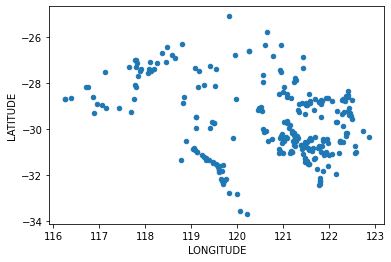

In [32]:
df.plot(kind="scatter", x="LONGITUDE", y="LATITUDE")

**Check for Missing Data**

In [33]:
# Checking the null values

df.isna().any()

PROJECT_CODE                               False
PROJECT_NAME                               False
PROJECT_SHORT                              False
PRIMARY COMMODITY                          False
SITE_CODE                                  False
LATITUDE                                   False
LONGITUDE                                  False
SITE_LOCATION                              False
ESTIMATING COMMODITY                       False
EST_COM_AB                                 False
EST_COM_P                                  False
TOTAL_MINERAL_RESOURCES (Mt)               False
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)    False
RES_CON_(Kg)                               False
RV_QTY_G_(g/t)                             False
RV_CON_(Kg)                                False
POINT_SIZE (Kg)                            False
Date                                       False
Gold_Value                                 False
RV_QTY_(Mt)                                False
Mineral_Land_Value_U

Count the number of Null Values in Each Column

In [34]:
# Count number of null values in each columns

df.isna().sum()

PROJECT_CODE                               0
PROJECT_NAME                               0
PROJECT_SHORT                              0
PRIMARY COMMODITY                          0
SITE_CODE                                  0
LATITUDE                                   0
LONGITUDE                                  0
SITE_LOCATION                              0
ESTIMATING COMMODITY                       0
EST_COM_AB                                 0
EST_COM_P                                  0
TOTAL_MINERAL_RESOURCES (Mt)               0
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t)    0
RES_CON_(Kg)                               0
RV_QTY_G_(g/t)                             0
RV_CON_(Kg)                                0
POINT_SIZE (Kg)                            0
Date                                       0
Gold_Value                                 0
RV_QTY_(Mt)                                0
Mineral_Land_Value_USD_Millions            0
dtype: int64

Drop NA Values if count is less than 5%

In [35]:
# We can drop the null value as their count is less than 5%

df.dropna(inplace=True)

**Remove variables not used for prediction**

In [36]:
df = df.drop([ "PROJECT_NAME", "PROJECT_CODE","PROJECT_SHORT","PRIMARY COMMODITY","SITE_CODE", "SITE_LOCATION", "ESTIMATING COMMODITY", "EST_COM_AB","EST_COM_P","Date" ,"LATITUDE", "LONGITUDE"], axis =1)

In [37]:
df

,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Gold_Value,RV_QTY_(Mt),Mineral_Land_Value_USD_Millions
0,7.014346,1.392000,9763.969632,2.099000,558.00000,9763.969632,1662.4,1.670000,2776.20800
1,0.715700,1.971598,1411.073000,3.365000,20642.21000,1411.073000,1662.4,1.354000,2250.88960
2,17.790000,1.859798,33085.800000,2.276660,14718.87760,47804.677600,1662.4,34.057692,56617.50738
3,59.980000,2.251367,135037.000000,1.798119,15923.12736,150960.127400,1662.4,34.251312,56939.38188
4,0.070000,2.100000,147.000000,1.864000,2.88800,147.000000,1662.4,2.230000,3707.15200
...,...,...,...,...,...,...,...,...,...
259,0.169000,2.554438,431.700000,2.648000,46174.44000,431.700000,1639.6,32.368000,53070.57280
260,10.073000,1.643145,16551.400000,2.183200,414.55000,16551.400000,1639.6,37.086300,60806.69748
261,0.092000,1.978043,181.980000,2.470000,3445.55000,181.980000,1639.6,25.288000,41462.20480
262,0.915000,4.681311,4283.400000,4.650000,31855.00000,4283.400000,1635.9,4.598000,7521.86820


**Data Normalization**

In [38]:
#df = df.iloc[:,1:]
df_norm=(df-df.mean())/df.std()
df_norm.head()

,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Gold_Value,RV_QTY_(Mt),Mineral_Land_Value_USD_Millions
0,-0.102712,-0.477403,-0.175929,-0.362381,-0.387147,-0.182937,-0.130125,-0.795782,-0.800929
1,-0.269034,-0.330159,-0.307362,0.189010,0.361965,-0.277723,-0.130125,-0.809883,-0.815155
2,0.181829,-0.358562,0.191040,-0.285004,0.141033,0.248734,-0.130125,0.649502,0.657134
3,1.295898,-0.259086,1.795241,-0.493427,0.185950,1.419303,-0.130125,0.658143,0.665850
4,-0.286085,-0.297540,-0.327252,-0.464733,-0.407852,-0.292067,-0.130125,-0.770792,-0.775718


**Code to convert predictiving value (Mineral_Land_Value_USD_Millions) back into price value from normalization**

In [40]:
y_mean = df['Mineral_Land_Value_USD_Millions'].mean()
y_std = df['Mineral_Land_Value_USD_Millions'].std()

def convert_label_value(pred): 
  return int(pred*y_std+y_mean)
print(convert_label_value (-0.800929)) # Validating function

2776


**Select Features**

In [41]:
X = df_norm.drop(columns='Mineral_Land_Value_USD_Millions')
X.head()

,TOTAL_MINERAL_RESOURCES (Mt),TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t),RES_CON_(Kg),RV_QTY_G_(g/t),RV_CON_(Kg),POINT_SIZE (Kg),Gold_Value,RV_QTY_(Mt)
0,-0.102712,-0.477403,-0.175929,-0.362381,-0.387147,-0.182937,-0.130125,-0.795782
1,-0.269034,-0.330159,-0.307362,0.189010,0.361965,-0.277723,-0.130125,-0.809883
2,0.181829,-0.358562,0.191040,-0.285004,0.141033,0.248734,-0.130125,0.649502
3,1.295898,-0.259086,1.795241,-0.493427,0.185950,1.419303,-0.130125,0.658143
4,-0.286085,-0.297540,-0.327252,-0.464733,-0.407852,-0.292067,-0.130125,-0.770792


**Select Labels**

In [42]:
Y = df_norm[['Mineral_Land_Value_USD_Millions']]
Y.head()

,Mineral_Land_Value_USD_Millions
0,-0.800929
1,-0.815155
2,0.657134
3,0.665850
4,-0.775718


**Data Partitioning**

Split Data into Training and Test set. 80& and 20% respectively.



In [43]:
x_train,x_test,y_train,y_test=train_test_split(X,Y, test_size=0.2, random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(211, 8) (211, 1)
(53, 8) (53, 1)


**Create DNN Model**

In [50]:

    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(8,input_shape = (8,), activation = 'relu'),
        tf.keras.layers.Dense(8,activation = 'relu'),
      tf.keras.layers.Dense(5,activation = 'relu'),
        tf.keras.layers.Dense(1)])
    model.compile(loss = 'mse', optimizer = 'adam')
    

   

    


In [51]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 72        
                                                                 
 dense_7 (Dense)             (None, 8)                 72        
                                                                 
 dense_8 (Dense)             (None, 5)                 45        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 195
Trainable params: 195
Non-trainable params: 0
_________________________________________________________________


**Train DNN Model**


In [52]:
cb = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = 5)
model = model
predict_on_untrained = model.predict(x_test)
history = model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs = 100, callbacks=[cb])

2/2 [==============================] - 0s 6ms/step
Epoch 1/100
7/7 [==============================] - 1s 36ms/step - loss: 1.7987 - val_loss: 0.5028
Epoch 2/100
7/7 [==============================] - 0s 6ms/step - loss: 1.6898 - val_loss: 0.4800
Epoch 3/100
7/7 [==============================] - 0s 7ms/step - loss: 1.6063 - val_loss: 0.4613
Epoch 4/100
7/7 [==============================] - 0s 6ms/step - loss: 1.5356 - val_loss: 0.4449
Epoch 5/100
7/7 [==============================] - 0s 6ms/step - loss: 1.4550 - val_loss: 0.4308
Epoch 6/100
7/7 [==============================] - 0s 6ms/step - loss: 1.3909 - val_loss: 0.4175
Epoch 7/100
7/7 [==============================] - 0s 6ms/step - loss: 1.3495 - val_loss: 0.4051
Epoch 8/100
7/7 [==============================] - 0s 11ms/step - loss: 1.2892 - val_loss: 0.3916
Epoch 9/100
7/7 [==============================] - 0s 10ms/step - loss: 1.2539 - val_loss: 0.3798
Epoch 10/100
7/7 [==============================] - 0s 13ms/step - loss: 

Plot Training and Validation Loss

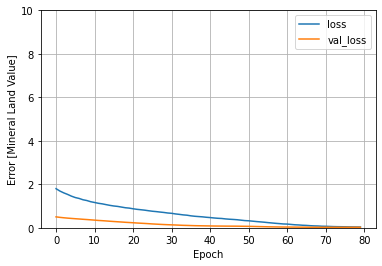

In [55]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.ylim([0, 10])
  plt.xlabel('Epoch')
  plt.ylabel('Error [Mineral Land Value]')
  plt.legend()
  plt.grid(True)
plot_loss(history)

**Predictions**

In [56]:
Preds_on_trained = model.predict(x_test)
Preds_on_trained.shape
Preds_on_trained
   

2/2 [==============================] - 0s 4ms/step


array([[ 0.4689279 ],
       [-0.70200694],
       [ 1.036511  ],
       [ 0.78592974],
       [-0.6281762 ],
       [-0.70993304],
       [-0.6565812 ],
       [-0.6817401 ],
       [ 0.6310831 ],
       [ 0.9399866 ],
       [ 0.24551764],
       [ 0.85909325],
       [-0.9123476 ],
       [-0.19555631],
       [ 0.8569795 ],
       [-0.7709049 ],
       [-0.56329566],
       [ 0.6855245 ],
       [-0.9284443 ],
       [-0.04649305],
       [-0.5748437 ],
       [-0.84314436],
       [-0.864719  ],
       [-0.87206   ],
       [-0.8305792 ],
       [ 0.7562577 ],
       [-0.7828979 ],
       [-0.48226088],
       [ 0.8827873 ],
       [-0.65256506],
       [ 1.0132563 ],
       [-0.6329733 ],
       [ 0.7166396 ],
       [-0.5231112 ],
       [-0.74345875],
       [ 0.78363013],
       [ 0.8558702 ],
       [ 0.37918487],
       [-0.8439232 ],
       [ 0.85909384],
       [-0.6592256 ],
       [ 0.5035322 ],
       [-0.82542163],
       [-0.49183315],
       [-0.79464364],
       [-0

Test on orignal dataset values

In [61]:
test_data = np.array([-0.5822, -0.477403,	-0.175929,	-0.362381,	-0.387147,	-0.182937,	-0.130125,	-0.795782])

test_data.reshape(1,8)

array([[-0.5822  , -0.477403, -0.175929, -0.362381, -0.387147, -0.182937,
        -0.130125, -0.795782]])

In [62]:
print(model.predict(test_data.reshape(1,8),batch_size=1))

1/1 [==============================] - 0s 58ms/step
[[-0.81919014]]


In [63]:
print('This is the value predicted mineral land value from input parameters',convert_label_value(-0.7161517),"Million USD dollars")

This is the value predicted mineral land value from input parameters 5906 Million USD dollars


**Creat User Interface**

This is when the customer enters in the parameters then they receive a predicted mineral price 

In [66]:
print(' Welcome to our mineral land prediction software!!!','\n','If you would like to make a prediction, please enter the following values')
print('Input Parameters')
a= float(input('TOTAL_MINERAL_RESOURCES(Mt)'))
b = float(input('TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t): '))
c = float(input('RES_CON_(Kg): '))
d = float(input('RV_QTY_G_(g/t): '))
e = float(input('RV_CON_(Kg): '))
f = float(input('POINT_SIZE(Kg): '))
g = float(input('Gold_Value: '))
h = float(input('RV_QTY_(Mt): '))

testdata = np.array([a,b,c,d,e,f,g,h])

print('Mineral Land Value in USD Millions =>',model.predict(testdata.reshape(1,8),batch_size=1))

#print('This is the value predicted mineral land value from input parameters',convert_label_value(-0.7161517),"Million USD dollars")

 Welcome to our mineral land prediction software!!! 
 If you would like to make a prediction, please enter the following values
Input Parameters
TOTAL_MINERAL_RESOURCES(Mt)3641
TOTAL_MINERAL_RESOURCES_AVG_GRADE_(g/t): 2.1
RES_CON_(Kg): 31.65
RV_QTY_G_(g/t): 2.0
RV_CON_(Kg): 1.68
POINT_SIZE(Kg): 1.483
Gold_Value: 1568
RV_QTY_(Mt): 1264.124
1/1 [==============================] - 0s 17ms/step
Mineral Land Value in USD Millions [[2.2189198]]
